## Module 8

In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
# [1]

# Create the path to your file directory and variables for the three files. 
file_dir = './Resources'
# Wikipedia data
wiki_file = f'{file_dir}/wikipedia-movies.json'
# Kaggle metadata
kaggle_metadata = f'{file_dir}/movies_metadata.csv'
# MovieLens rating data.
ratings = f'{file_dir}/ratings.csv'

In [3]:
#[2]

with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)
    print(len(wiki_movies_raw))

7311


In [4]:
#[3]

# First 5 records
##wiki_movies_raw[:5]

In [5]:
#[3a]

# Last 5 records
##wiki_movies_raw[-5:]

In [6]:
#[3b]

# It's always a good idea to check records in the middle as well. 
# Choose a number somewhere around the halfway mark and look at
# a handful of records after that index.

# Some records in the middle
##wiki_movies_raw[3600:3605]

In [7]:
#[4]

#Convert to data frame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
##wiki_movies_df.head()

In [8]:
#[5] 8.3.3

# there are 5 rows of data and 193 columns. That's a lot of columns! 
# Even if we try to use print(wiki_movies_df.columns), 
# they won't all print out. We'll have to convert wiki_movies_df.columns 
#to a list to see all of the columns.
# NOTE: We can also use .to_list()

# Convert to a list
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [9]:
#[6] 

#8.3.3
# Create a list comprehension with the filter expression 
# we created and save that to an intermediate variable 
# wiki_movies.CHECK VIDEO FOR STEPS 8.3.1

# Looking for columns we need and don't need
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [10]:
#[6a] Note: from video 8.3.3

# New variable
wiki_df = pd.DataFrame(wiki_movies)
##wiki_df.head()

In [11]:
#[8] Information ONLY!

#8.3.5
# write a simple function to make a copy of the movie and return it.
#def clean_movie(movie):
    #movie = dict(movie) #create a non-destructive copy
    #return movie   

In [12]:
##wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

In [13]:
#[9]

# Skill drill 8.3.5
# The following will display columns in alphabetical order.
##sorted(wiki_movies_df.columns.tolist())

In [14]:
#[10] 8.3.6  INFORMATION ONLY!

# There are quite a few columns with slightly different names but 
# the same data, such as "Directed by" and "Director."
# We need to consolidate columns with the same data into one column. 
# Remember that this new function is enclosed within the clean_movie 
# function that we created earlier:

# def change_column_name(old_name, new_name):
       # if old_name in movie:
           # movie[new_name] = movie.pop(old_name)


In [15]:
#[11] 8.3.5 / 8.3.6

# Step 1: Make an empty dict to hold all of the alternative titles.

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    
# Step 2: Loop through a list of all alternative title keys.
# combine alt. titles into one list

    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
# Step 2a: Check if the current key exists in the movie object.
# Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary.


        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
# Step 3: After looping through every key, add the alternative titles dict to the movie object.

    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
     # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie



In [16]:
#[12] 8.3.5 /8.3.6

# We can make a list of cleaned movies with a list comprehension:

clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [17]:
# [13] 8.3.5

# Set wiki_movies_df to be the DataFrame created from clean_movies, 
# and print out a list of the columns.

wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [18]:
#[14] 8.3.7

# code to extract the IMDb ID 
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [19]:
#[15] 8.3.7 INFO ONLY!

# One way to get the count of null values for each column is to use a list comprehension, as shown below.
#[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]


In [20]:
#[16] 8.3.7

# make a list of columns that have less than 90% null values 
# and use those to trim down our dataset. it will give us 
# the columns that we want to keep which we can select from our Pandas DataFrame as follows:

wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
#wiki_movies_df

## Parse Box Office Data

In [21]:
#[17] 8.3.8

# make a data series that drops missing values with the following:
# As a habit, always check the number of data points that exist after 
# you drop any data. Here we have 5,485 movies with box office data.
# Regular expressions only work on strings, so we'll need to make sure 
# all of the box office data is entered as a string. By using the 
# apply() method, we can see which values are not strings. First, 
# make a is_not_a_string() function:


## box_office = wiki_movies_df['Box office'].dropna()
## def is_not_a_string(x):
##     return type(x) != str
## box_office[box_office.map(is_not_a_string)]

# We can update our map() call to use the lambda function 
# directly instead of using is_not_a_string():

box_office = wiki_movies_df['Box office'].dropna()
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [22]:
# INFORMATION ONLY!

# Looking through the data, many of the box office numbers 
# are written either like "\$123.4 million" (or billion) or "\$123,456,789." 
# We'll use regular expressions to find out just how many of each style are in our data.
# Note: we import built in python module for regular expressions
# import re

In [23]:
#[18] 8.3.8

# We'll use a simple space as our joining character and 
# apply the join() function only when our data points are 
# lists. The code looks like the following:

box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [24]:
#[19] 8.3.10

# Create a variable form_one and set it equal 
# to the finished regular expression string. 
# Because we need the escape characters to remain, 
# we need to preface the string with an r. then

# count up how many box office values match our first form. 
# use the str.contains() method on box_office. 
# To ignore whether letters are uppercase or lowercase, 
# add an argument called flags, and set it equal to re.IGNORECASE. 
# Finally, we can call the sum()method to count up the total 
# number that return True. Output shows box office values 
# that match the form $123.4 million/billion


form_one = r'\$\d+\.?\d*\s*[mb]illion'
# count up how many box office values match our first form. 
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [25]:
#[20] 8.3.10

# Now count up the number of box office values 
# that match this pattern. Outpt shows that there 
# are 1544 values that match $123,456,789

form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [26]:
#[21] 8.3.10

# Most of the box office values are described by either form. 
# Now we want to see which values aren't described by either. 
# To be safe, we should see if any box office values are 
# described by both. Create two boolean Series 

# Note: this will throw an error
# box_office[(not matches_form_one) and (not matches_form_two)]

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [27]:
#[22] 8.3.10

# We can now see which entries do not fit the expected formatting.

box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [28]:
#[23] 8.3.10

# Fix pattern matches 

form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)'

In [29]:
#[24] 8.3.10

box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [30]:
#[25]

# Extract and Convert the Box Office Values

box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [31]:
#[26] 8.3.10

# Now we need a function to turn the extracted values 
# into a numeric value. We'll call it parse_dollars, 
# and parse_dollars will take in a string and return 
# a floating-point number. 

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [32]:
#[27]

# extract the values from box_office using str.extract. 
# Then we'll apply parse_dollars to the first column in 
# the DataFrame returned by str.extract, 

wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [33]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [34]:
#[28] 8.3.10

# We no longer need the Box Office column, so we'll just drop it:

wiki_movies_df.drop('Box office', axis=1, inplace=True)

## 8.3.11 Parse Budget Data

In [35]:
#[29] 8.3.11

# Parse Budget data

budget = wiki_movies_df['Budget'].dropna()
# Convert any lists to strings:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [36]:
# Then remove any values between a dollar sign and a hyphen (for budgets given in ranges):
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [37]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [38]:
wiki_movies_df['Budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


In [39]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

## Parse Realease Date

In [40]:
#[30] 8.3.11

# First, make a variable that holds the non-null 
# values of Release date in the DataFrame, 
# converting lists to strings:

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
##release_date

In [41]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [42]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [43]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

## Parse Running Time

In [44]:
#[31] 8.3.11

# First, make a variable that holds the non-null 
# values of Release date in the DataFrame, converting 
# lists to strings:

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [45]:
# It looks like most of the entries just look like "100 minutes." 
# Let's see how many running times look exactly like that by using string boundaries.

running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [46]:
# Let's get a sense of what the other 366 entries look like.

running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [47]:
# Let's make this more general by only marking the beginning 
# of the string, and accepting other abbreviations of "minutes" 
# by only searching up to the letter "m."

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [48]:
# That accounts for 6,877 entries. The remaining 17 follow:

running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [49]:
# We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

# Start with one or more digits.
# Have an optional space after the digit and before the letter "h."
# Capture all the possible abbreviations of "hour(s).
# " To do this, we'll make every letter in "hours" optional except the "h."
# Have an optional space after the "hours" marker.
# Have an optional number of digits for minutes.
# As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*".

running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [50]:
# Unfortunately, this new DataFrame is all strings, 
# we'll need to convert them to numeric values. Because 
# we may have captured empty strings, we'll use the to_numeric() 
# method and set the errors argument to 'coerce'. Coercing the errors 
# will turn the empty strings into Not a Number (NaN), then we 
# can use fillna() to change all the NaNs to zeros.

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [51]:
# Now we can apply a function that will convert the hour 
# capture groups and minute capture groups to minutes if 
# the pure minutes capture group is zero, and save the output to wiki_movies_df:

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [52]:
# Finally, we can drop Running time from the dataset with the following code:

wiki_movies_df.drop('Running time', axis=1, inplace=True)


## Kaggle & Ratings file

In [64]:
#[32] 8.2.2

# Convert to DataFrame
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

In [65]:
# First five rows
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [66]:
# Five random rows
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1943,False,NaN,28000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,10439,tt0107120,en,Hocus Pocus,"After 300 years of slumber, three sister witch...",...,1993-07-16,39514713.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's just a bunch of Hocus Pocus.,Hocus Pocus,False,6.5,491.0
8574,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,15421,tt0057877,en,Becket,King Henry II of England has trouble with the ...,...,1964-03-11,0.0,148.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"An age of rampant lusts, abandon, runaway pass...",Becket,False,7.2,45.0
28250,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49789,tt0082940,en,Priest of Love,Following the banning and burning of his novel...,...,1981-10-11,0.0,125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Priest of Love,False,0.0,0.0
41249,False,NaN,220093,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...",http://www.purepwnage.com,393629,tt4682866,en,Pure Pwnage: Teh Movie,Kyle wants to make a Pure Pwnage movie but he ...,...,2016-01-23,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest video game player of all time ret...,Pure Pwnage: Teh Movie,False,8.4,5.0
28762,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,75028,tt0479000,pt,The Coconut Revolution,The movie tells the story of the successful up...,...,2000-12-31,0.0,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Coconut Revolution,False,0.0,0.0


In [67]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


## Clean the Kaggle Data 8.3.12

In [68]:
#[33]

# Because the Kaggle data came in as a CSV, one of the first 
# things we want to check is that all of the columns 
# came in as the correct data types.

kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
# Note: Remember, the "object" data type is usually for strings. 
# Only four columns were successfully converted to a 
# data type—revenue, runtime, vote_average, and vote_count—but 
# taking a look through the DataFrame, we can see some columns 
# that should be specific data types.

In [69]:
# Before we convert the "adult" and "video" columns, 
# we want to check that all the values are either True or False.


kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [70]:
# Clearly, we have some bad data in here. Let's remove it.
# To remove the bad data, use the following:

# Note: Somehow the columns got scrambled for these three movies.
# The biggest concern is that none of the data in these rows looks like an imdb_id

kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# The following code will keep rows where the adult 
# column is False, and then drop the adult column.

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [72]:
# Now we look at the values from video column
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [73]:
# Great, there are only False and True values. We can convert video fairly easily.
# kaggle_metadata['video'] == 'True' this code creates the 
# Boolean column we want. We just need to assign it back to video:

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [74]:
# For the numeric columns, we can just use 
# the to_numeric() method from Pandas. We'll make sure 
# the errors= argument is set to 'raise', so we'll know 
# if there's any data that can't be converted to numbers.

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [75]:
# Finally, we need to convert release_date to datetime. 
# Luckily, Pandas has a built-in function for 
# that as well: to_datetime().

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

## Clean Ratings Data  8.3.12

In [76]:
#[34] 8.3.12

# use the info() method on the DataFrame. Since the ratings 
# dataset has so many rows, we need to set the null_counts option to True.

ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [78]:
# The Unix time standard stores points of time
# as integers, specifically as the number of 
# seconds that have elapsed since midnight 
# of January 1, 1970. This is known as the Unix epoch. 

# We'll specify in to_datetime() that the origin 
# is 'unix' and the time unit is seconds.

pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [79]:
# These dates don't seem outlandish—the 
# years are within expected bounds, and 
# there appears to be some consistency from 
# one entry to the next. Since the output looks 
# reasonable, assign it to the timestamp column.

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

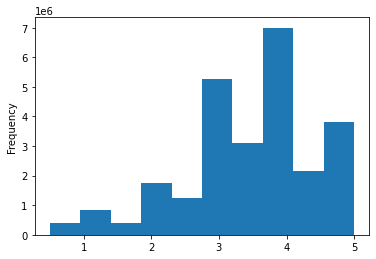

In [80]:
# Finally, we'll look at the statistics of 
# the actual ratings and see if there are any 
# glaring errors. A quick, easy way to do this 
# is to look at a histogram of the rating distributions, 
# and then use the describe() method to print out some 
# stats on central tendency and spread.

pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [ ]:
# Note:
# That seems to make sense. People are more 
# likely to give whole number ratings than 
# half, which explains the spikes in the histogram. 
# The median score is 3.5, the mean is 3.53, and 
# all the ratings are between 0 and 5.